# Liver Disease

In [2]:
#pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
data = pd.read_csv('indian_liver_patient.csv')

In [4]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
data.shape

(583, 11)

In [6]:
data.info()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [7]:
data.describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [10]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [11]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

In [12]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [13]:
def binary_encoding(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [14]:
data = binary_encoding(data, 'Gender', 'Male')
data = binary_encoding(data, 'Dataset', 2)

In [15]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,0


In [16]:
y = data['Dataset']
x = data.drop('Dataset', axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

x = scaler.fit_transform(x)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
x.shape

(583, 10)

In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Dataset, Length: 583, dtype: int64

In [22]:
inputs = tf.keras.Input(shape=(10,))
_x = tf.keras.layers.Dense(64, activation='relu')(inputs)
_x = tf.keras.layers.Dense(64, activation='relu')(_x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(_x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

batch_size = 64
epochs = 22

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=3
)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'pandas.core.series.Series'>

In [23]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': 'Epoch', 'value': 'Loss'},
    title='Training and Validation Loss'
)

fig.show()

NameError: name 'history' is not defined

In [43]:
np.argmin(history.history['val_loss']) + 1

22

In [44]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 11ms/step - loss: 0.4749 - accuracy: 0.7179 - auc: 0.7352


[0.4748663604259491, 0.7179487347602844, 0.7351524829864502]

# By Classification

In [34]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data = pd.read_csv('indian_liver_patient.csv')

In [36]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


416
167


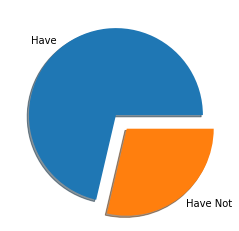

In [37]:
len_have = len(data['Dataset'][data.Dataset == 1])
len_have_not = len(data['Dataset'][data.Dataset == 2])

print(len_have)
print(len_have_not)

arr = np.array([len_have, len_have_not])

labels = ['Have', 'Have Not']

plt.pie(arr, labels=labels, explode=[0.0, 0.2], shadow=True)
plt.show()

In [38]:
data.shape

(583, 11)

In [39]:
data.info()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [40]:
data.describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [41]:
# One way of getting Gender into numbers
# data_2 = data.get_dummies(data, columns='Gender', drop_first=False)

# Another way
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
data['Dataset'] = data['Dataset'].apply(lambda x: 1 if x == 2 else 0)

In [42]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [43]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

In [44]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

x = data.drop('Dataset', axis=1)
y = data['Dataset']

In [46]:
from collections import Counter

counter = Counter(y)

for k, v in counter.items():
    dist = v / len(y) * 100
    print(f'Class={k}, n={v} ({dist}%)')

Class=0, n=416 (71.35506003430532%)
Class=1, n=167 (28.644939965694682%)


In [47]:
#pip install imblearn 

In [48]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [49]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)
x, y = pipeline.fit_resample(x, y)

In [50]:
counter = Counter(y)

for k, v in counter.items():
    dist = v / len(y) * 100
    print(f'Class={k}, n={v} ({dist}%)')

Class=0, n=416 (50.0%)
Class=1, n=416 (50.0%)


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

def model_evaluation(y_test, y_pred):
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))    
    print('Precision Score:', precision_score(y_test, y_pred))    
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('f1_score:', f1_score(y_test, y_pred))    

In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

In [54]:
model_evaluation(y_test, lr_pred)

Accuracy Score: 0.6826347305389222
Recall Score: 0.782608695652174
Precision Score: 0.6857142857142857
Confusion Matrix:
 [[42 33]
 [20 72]]
f1_score: 0.7309644670050761


In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_pip = make_pipeline(StandardScaler(), LogisticRegression())
lr_pip.fit(x_train, y_train)

lr_pip_pred = lr_pip.predict(x_test)

In [56]:
model_evaluation(y_test, lr_pip_pred)

Accuracy Score: 0.6706586826347305
Recall Score: 0.7608695652173914
Precision Score: 0.6796116504854369
Confusion Matrix:
 [[42 33]
 [22 70]]
f1_score: 0.7179487179487181


In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ['rbf']
}

grid = GridSearchCV(SVC(), params_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.519 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.511 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.609 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.564 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.564 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.789 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.699 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.797 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.835 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.759 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.729 total time=   0.0s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [58]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [67]:
svcc = SVC(C=10, gamma=0.01).fit(x_train, y_train)
print(svcc.predict(x_test))
# print(svcc_pred)
print(x_test)

[1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0
 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1]
     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
610   27       1         0.920585          0.260292                   170   
819   59       1         0.672651          0.136325                   183   
290   12       1         1.000000          0.200000                   719   
559   65       1         1.400000          0.600000                   260   
168   26       1         1.300000          0.400000                   173   
..   ...     ...              ...               ...                   ...   
192   42       1        30.500000         14.200000                   285   
651   46       1         0.561601          0

In [60]:
model_evaluation(y_test, svcc_pred)

Accuracy Score: 0.8203592814371258
Recall Score: 0.782608695652174
Precision Score: 0.8780487804878049
Confusion Matrix:
 [[65 10]
 [20 72]]
f1_score: 0.8275862068965518


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(x_train, y_train)
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_
    
    print('Training Score: {:.3f}'.format(best_score))
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test Score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={
    'criterion': ['entropy', 'gini'],
    'splitter': ['random', 'best'],
    'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01],
    'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
    'min_samples_leaf': [1, 0.01, 0.02, 0.03, 0.04],
    'min_impurity_decrease': [0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
    'max_leaf_nodes': [10, 15, 20, 25, 30, 35, 40, 45, 50, None],
    'max_features': ['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
    'max_depth': [None, 2, 4, 6 ,8],
    'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
})

Training Score: 0.711
Test Score: 0.713


DecisionTreeClassifier(criterion='entropy', max_features=0.85,
                       max_leaf_nodes=30, min_impurity_decrease=0.005,
                       min_samples_split=10, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [30]:
ds_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.8,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

ds_clf.fit(x_train, y_train)
ds_pred = ds_clf.predict(x_test)

In [31]:
model_evaluation(y_test, ds_pred)

Accuracy Score: 0.7305389221556886
Recall Score: 0.8478260869565217
Precision Score: 0.7155963302752294
Confusion Matrix:
 [[44 31]
 [14 78]]
f1_score: 0.7761194029850746


In [32]:
from sklearn.ensemble import RandomForestClassifier

randomized_search(params={
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
    'max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
    'max_depth': [None, 2, 4, 6, 8, 10, 20],
}, clf=RandomForestClassifier(random_state=2))

Training Score: 0.714
Test Score: 0.766


RandomForestClassifier(max_depth=4, max_features=0.6,
                       min_impurity_decrease=0.01, min_samples_leaf=4,
                       random_state=2)

In [33]:
rf_clf = RandomForestClassifier(max_depth=8, max_features=0.6,
                       min_impurity_decrease=0.01, min_samples_leaf=30,
                       random_state=2)

rf_clf.fit(x_train, y_train)

rf_pred = rf_clf.predict(x_test)

In [34]:
model_evaluation(y_test, rf_pred)

Accuracy Score: 0.7305389221556886
Recall Score: 0.8695652173913043
Precision Score: 0.7079646017699115
Confusion Matrix:
 [[42 33]
 [12 80]]
f1_score: 0.7804878048780486


In [36]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [35]:
from xgboost import XGBClassifier

xgb1 = XGBClassifier(colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=400, subsample=1.0)

eval_set = [(x_test, y_test)]

xgb1.fit(x_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=eval_set, verbose=True)

ModuleNotFoundError: No module named 'xgboost'

In [60]:
xg_pred = xgb1.predict(x_test)

In [61]:
model_evaluation(y_test, xg_pred)

Accuracy Score: 0.7544910179640718
Recall Score: 0.8152173913043478
Precision Score: 0.7575757575757576
Confusion Matrix:
 [[51 24]
 [17 75]]
f1_score: 0.7853403141361256


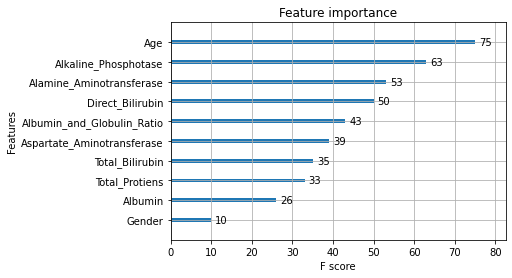

In [62]:
from xgboost import plot_importance
plot_importance(xgb1)
plt.show()

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0)
gbdt.fit(x_train, y_train)

pred_gbdt = gbdt.predict(x_test)
model_evaluation(y_test, pred_gbdt)

Accuracy Score: 0.6766467065868264
Recall Score: 0.7065217391304348
Precision Score: 0.7065217391304348
Confusion Matrix:
 [[48 27]
 [27 65]]
f1_score: 0.7065217391304348


In [61]:
import joblib

joblib.dump(svcc, 'liver-svc.pkl')

['liver-svc.pkl']

In [62]:
model_svc = joblib.load('liver-svc.pkl')

In [63]:
model_svc


SVC(C=10, gamma=0.01)